In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/gdrive/MyDrive/FORTFOLIO/bank-data.csv")
df.head(15)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [8]:
df.shape

(600, 12)

In [9]:
df.drop("id", axis=1, inplace=True)

#b, Trực quan hóa bằng các dạng biểu đồ

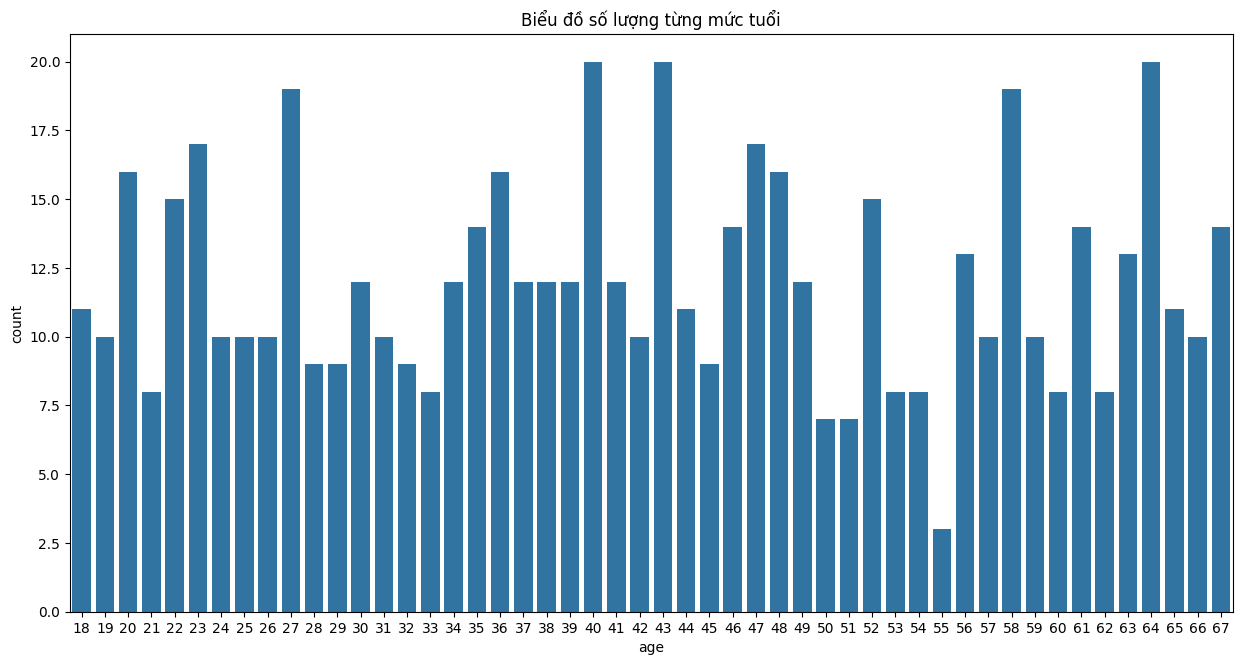

In [10]:
#Biểu đồ cột
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'age' is the correct column name in your DataFrame
plt.figure(figsize=(15,7.5))
plt.title("Biểu đồ số lượng từng mức tuổi")

# Use the 'x' parameter to specify the column containing age data
sns.countplot(x='age', data=df)

plt.show()

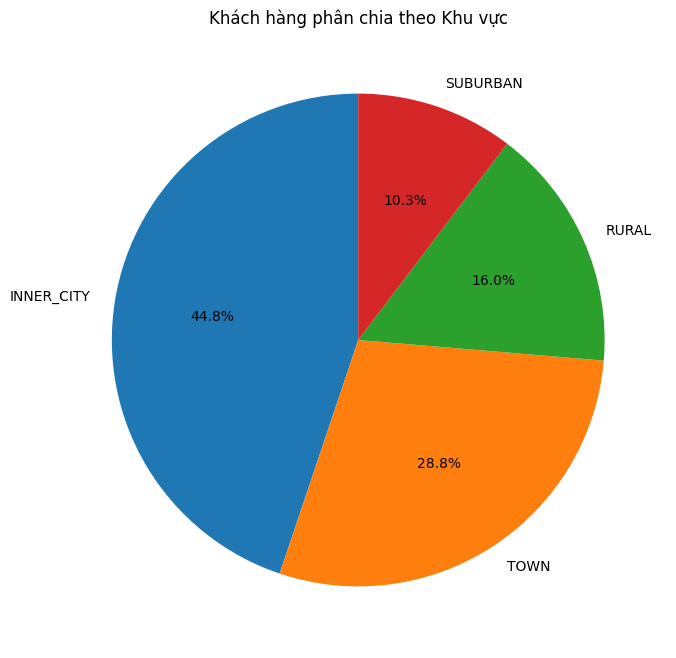

In [11]:
region_counts = df["region"].value_counts()
plt.figure(figsize = (8,8))
plt.pie(region_counts, labels = region_counts.index, startangle = 90,autopct='%1.1f%%')

plt.title("Khách hàng phân chia theo Khu vực")

plt.show()

<Axes: title={'center': 'income'}, xlabel='mortgage'>

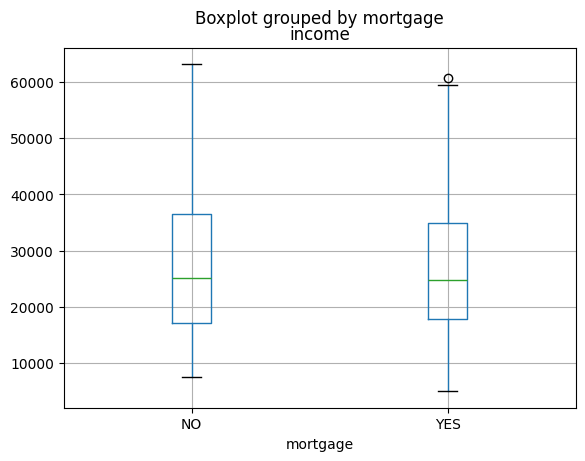

In [12]:
#Phân phối thu nhập theo mortgage
df.boxplot('income', by='mortgage')

<Axes: ylabel='income'>

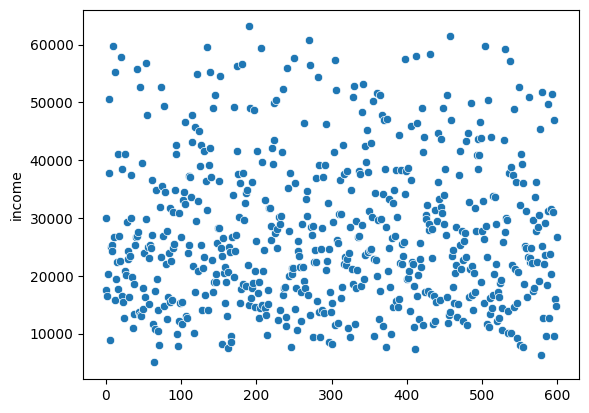

In [13]:
#Phân phối thu nhập
sns.scatterplot(df["income"])

<Axes: xlabel='income', ylabel='Count'>

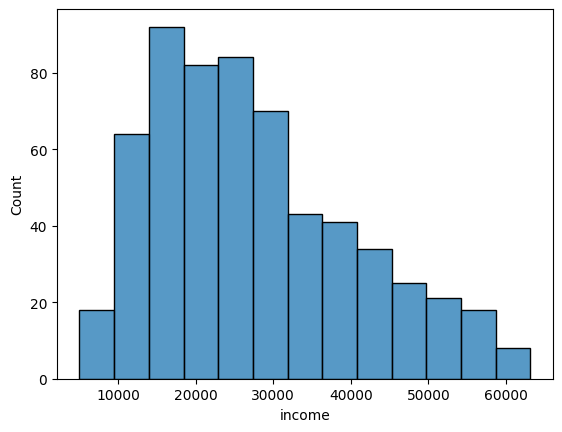

In [14]:
# Phân phối thu nhập của khách hàng
sns.histplot(df["income"])

Text(0, 0.5, 'Thu nhập')

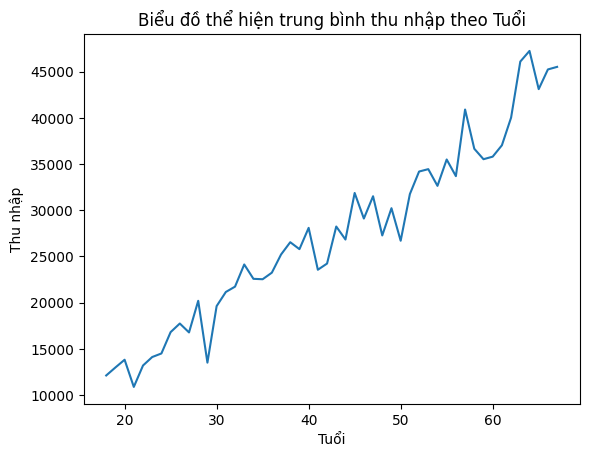

In [15]:
#Trung bình thu nhập theo độ tuổi
df.groupby("age")["income"].mean().plot(kind="line")
plt.title('Biểu đồ thể hiện trung bình thu nhập theo Tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Thu nhập')

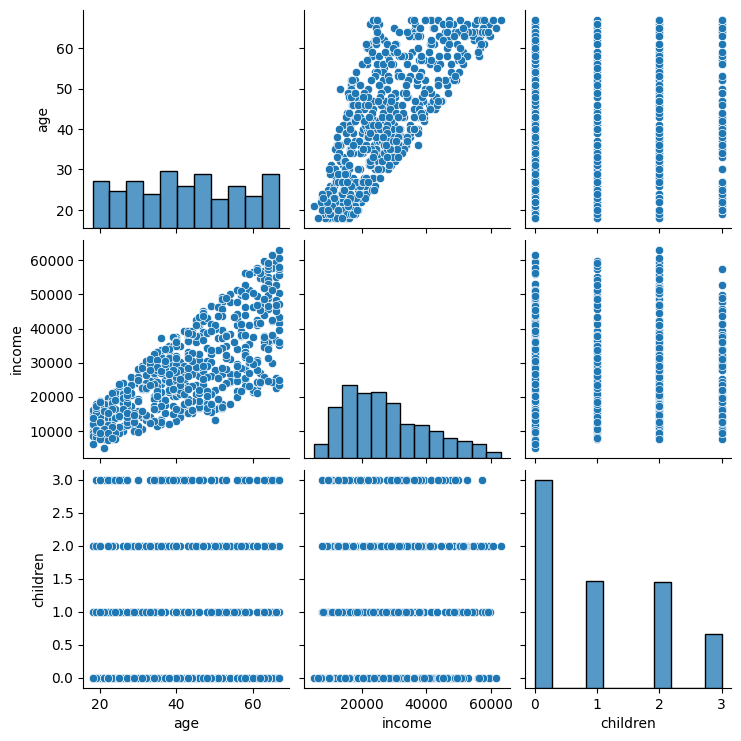

In [16]:

attributes = ["age", "income", "children"]

sns.pairplot(df[attributes])


In [17]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_region=LabelEncoder()
le_married=LabelEncoder()
le_car=LabelEncoder()
le_save_act=LabelEncoder()
le_current_act=LabelEncoder()
le_mortgage=LabelEncoder()
le_pep=LabelEncoder()

In [18]:
df['Sex']=le_sex.fit_transform(df['sex'])
df['Region']=le_region.fit_transform(df['region'])
df['Married']=le_married.fit_transform(df['married'])
df['Car']=le_car.fit_transform(df['car'])
df['Save_act']=le_save_act.fit_transform(df['save_act'])
df['Current_act']=le_current_act.fit_transform(df['current_act'])
df['Mortgage']=le_mortgage.fit_transform(df['mortgage'])
df['Pep']=le_pep.fit_transform(df['pep'])

df_n=df.drop(['sex','region','married','car','save_act','current_act','mortgage','pep'],axis='columns')

df_n

,age,income,children,Sex,Region,Married,Car,Save_act,Current_act,Mortgage,Pep
0,48,17546.00,1,0,0,0,0,0,0,0,1
1,40,30085.10,3,1,3,1,1,0,1,1,0
2,51,16575.40,0,0,0,1,1,1,1,0,0
3,23,20375.40,3,0,3,1,0,0,1,0,0
4,57,50576.30,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,0,0,0,1,1,1,1,0
596,30,9672.25,0,0,0,1,1,1,1,0,0
597,31,15976.30,0,0,3,1,1,1,0,0,1
598,29,14711.80,0,1,0,1,0,1,0,1,0


In [19]:
df_n.corr()

,age,income,children,Sex,Region,Married,Car,Save_act,Current_act,Mortgage,Pep
age,1.000000,0.752726,0.023572,-0.090081,0.011167,0.010394,0.077733,0.184389,-0.035312,-0.016154,0.173825
income,0.752726,1.000000,0.036761,-0.023845,-0.000212,-0.008386,0.081556,0.266164,0.031616,-0.014662,0.221991
children,0.023572,0.036761,1.000000,-0.014206,0.011520,-0.048716,0.036455,0.041536,0.006238,-0.074339,-0.057663
Sex,-0.090081,-0.023845,-0.014206,1.000000,-0.035018,0.021110,0.006667,0.007207,-0.019466,0.066465,0.046843
Region,0.011167,-0.000212,0.011520,-0.035018,1.000000,0.006188,0.021860,0.084382,-0.013356,0.026083,-0.027279
Married,0.010394,-0.008386,-0.048716,0.021110,0.006188,1.000000,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
Car,0.077733,0.081556,0.036455,0.006667,0.021860,-0.009571,1.000000,0.034310,-0.034783,-0.007743,0.018917
Save_act,0.184389,0.266164,0.041536,0.007207,0.084382,0.028604,0.034310,1.000000,0.042511,-0.001588,-0.072779
Current_act,-0.035312,0.031616,0.006238,-0.019466,-0.013356,-0.059996,-0.034783,0.042511,1.000000,-0.036704,0.025141
Mortgage,-0.016154,-0.014662,-0.074339,0.066465,0.026083,-0.021711,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


<Axes: >

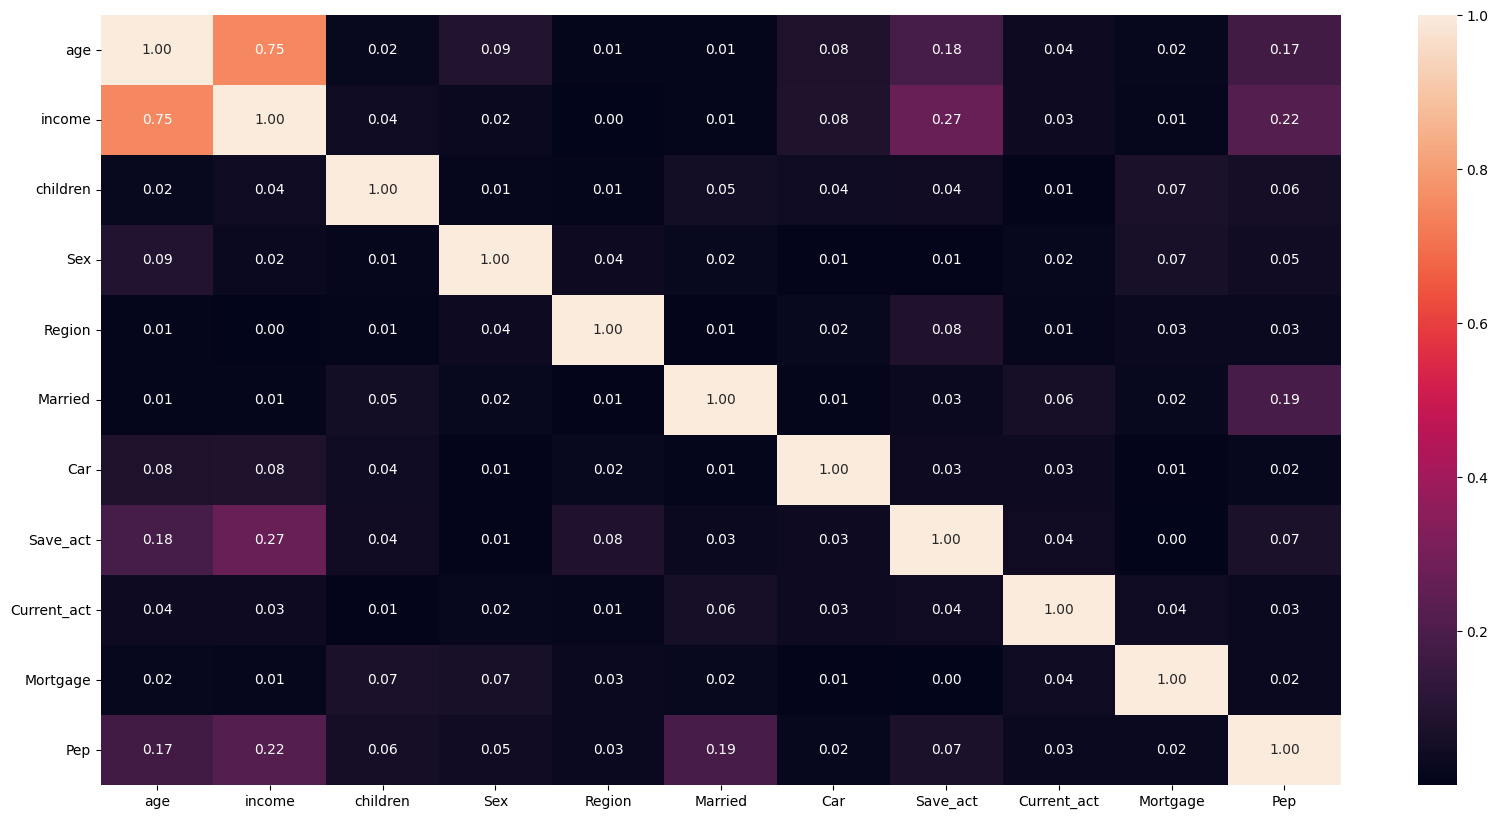

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_n.corr().abs(), annot=True,fmt = ".2f")

In [21]:
#NORMALIZATION AND STANDARDIZATION

from sklearn.preprocessing import MinMaxScaler, StandardScaler

minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

nor_arr = minMaxScaler.fit_transform(df_n)
std_arr = standardScaler.fit_transform(df_n)

nor_df = pd.DataFrame(nor_arr)

nor_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.612245,0.215634,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,0.448980,0.431395,1.000000,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0
2,0.673469,0.198933,0.000000,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0
3,0.102041,0.264320,1.000000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0
4,0.795918,0.783987,0.000000,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0
5,0.795918,0.565343,0.666667,0.0,1.000000,1.0,0.0,1.0,1.0,0.0,1.0
6,0.081633,0.066468,0.000000,1.0,0.333333,0.0,0.0,0.0,1.0,0.0,1.0
7,0.816327,0.342977,0.000000,1.0,1.000000,1.0,1.0,1.0,1.0,0.0,0.0
8,0.387755,0.349132,0.666667,0.0,0.666667,1.0,1.0,0.0,0.0,0.0,0.0
9,0.734694,0.330338,0.666667,1.0,1.000000,1.0,1.0,1.0,1.0,0.0,0.0


In [22]:
std_df = pd.DataFrame(std_arr)

std_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.388887,-0.774168,-0.011049,-1.0,-0.958465,-1.393261,-0.986754,-1.491914,-1.771421,-0.731113,1.090771
1,-0.166170,0.198706,1.883121,1.0,1.376091,0.717741,1.013423,-1.491914,0.564519,1.367777,-0.916783
2,0.597034,-0.849474,-0.958135,-1.0,-0.958465,0.717741,1.013423,0.670280,0.564519,-0.731113,-0.916783
3,-1.345667,-0.554643,1.883121,-1.0,1.376091,0.717741,-0.986754,-1.491914,0.564519,-0.731113,-0.916783
4,1.013327,1.788562,-0.958135,-1.0,-0.180280,0.717741,-0.986754,0.670280,-1.771421,-0.731113,-0.916783
5,1.013327,0.802684,0.936036,-1.0,1.376091,0.717741,-0.986754,0.670280,0.564519,-0.731113,1.090771
6,-1.415050,-1.446767,-0.958135,1.0,-0.180280,-1.393261,-0.986754,-1.491914,0.564519,-0.731113,1.090771
7,1.082709,-0.199976,-0.958135,1.0,1.376091,0.717741,1.013423,0.670280,0.564519,-0.731113,-0.916783
8,-0.374317,-0.172223,0.936036,-1.0,0.597906,0.717741,1.013423,-1.491914,-1.771421,-0.731113,-0.916783
9,0.805180,-0.256964,0.936036,1.0,1.376091,0.717741,1.013423,0.670280,0.564519,-0.731113,-0.916783


In [23]:
from sklearn.model_selection import train_test_split

X = df_n.drop("Pep", axis=1)
y = df_n["Pep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,age,income,children,Sex,Region,Married,Car,Save_act,Current_act,Mortgage
110,36,37330.5,2,1,3,0,0,1,1,0
419,57,21612.6,0,1,3,1,0,1,1,1
565,30,24867.6,0,1,3,1,1,1,0,0
77,61,49456.7,1,1,0,1,1,1,1,1
181,60,56658.9,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
399,43,38059.8,0,1,3,1,1,1,0,1
340,45,28864.9,0,0,2,1,0,1,1,0
148,63,25732.5,0,1,1,1,1,1,0,0
494,47,43743.2,3,0,1,1,0,1,1,0


In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictDf = pd.DataFrame({"Actuals": y_test, "Prediction": y_pred})
predictDf

,Actuals,Prediction
110,1,1
419,0,0
565,0,0
77,1,1
181,1,1
...,...,...
399,0,1
340,0,0
148,0,1
494,0,1


In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[50 16]
 [ 5 49]]


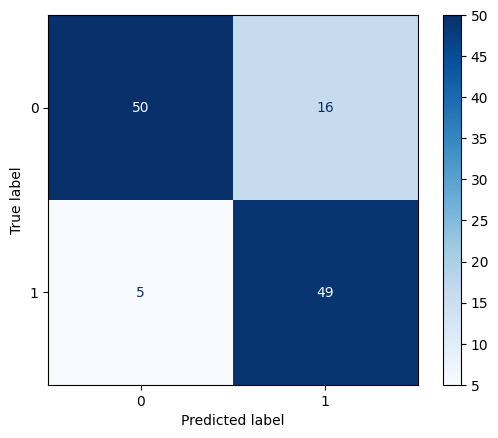

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap=plt.cm.Blues)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

valid_predict = model.predict(X_valid)
valid_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1])

In [28]:
from sklearn.metrics import accuracy_score, mean_squared_error

print(f"Accuracy Score: {accuracy_score(y_valid, valid_predict)}")
print(f"MSE: {mean_squared_error(y_valid, valid_predict)}")

Accuracy Score: 0.8333333333333334
MSE: 0.16666666666666666


In [29]:
age = 40 # @param {type:"integer"}
sex = 1 # @param {type:"integer"}
region = 2 # @param {type:"integer"}
income = 1237123.2 # @param {type:"number"}
married = 1 # @param {type:"integer"}
children = 3  # @param {type:"integer"}
car = 1  # @param {type:"integer"}
save_act = 1  # @param {type:"integer"}
current_act = 0  # @param {type:"integer"}
mortgage = 0  # @param {type:"integer"}


In [30]:
data = [[age, sex, region, income, married, children, car, save_act, current_act, mortgage]]

inputDf = pd.DataFrame({"age": age, "sex": sex, "region": region, "income": income, "married": married, "children": children, "car": car, "save_act": save_act, "current_act": current_act, "mortgage": mortgage},index=[0])
inputDf

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,40,1,2,1237123.2,1,3,1,1,0,0


In [31]:
user_predict = model.predict(data)
user_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
y_true = 1 # @param {type:"integer"}

In [33]:
print(f"Accuracy: {accuracy_score([y_true], user_predict)}")
print(f"MSE: {mean_squared_error([y_true], user_predict)}")

Accuracy: 1.0
MSE: 0.0
